# Startup Success Prediction Model

## Problem Statement

    Startup is a business that has just been established and grown supported by digital services and has also become an         important element of innovation systems and economies around the world. The Startup ecosystem is growing very rapidly       and still needs a lot of funding to operate with a minimalist working group. So it is very important for VC to monitor     the performance and performance of Startup, so that it can be used as a consideration to decide whether to fund a           Startup to drive its growth or refuse to take part in funding. To monitor startup performance, it is important to           analyze what makes a Startup successful and how to determine its success.

### Goals

     The goal to be achieved is to determine whether a StartUp will be successful or not.

### Objective

     The objective is to analyze startup behavior based on several variables, 
     determine what variables affect startup success the most, then build
     a model that can predict the success of a StartUp using Lgbm and Achieve 94 %
     Precision - recall score 

# Data Exploration

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
stup = pd.read_csv('startup data.csv')

In [3]:
stup.head(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,...,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,...,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,...,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,...,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,...,c:498,1,1,1,0,0,0,1.0000,1,acquired


### Description

In [4]:
stup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

### Data type identification

In [5]:
stup.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

### Data Numeric 

In [6]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
stup_num=stup.select_dtypes(include=numeric)
stup_num.head(3)

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,...,0,1,0,1,0,0,0,0,1.00,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,...,0,0,1,0,0,1,1,1,4.75,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,...,0,0,0,0,1,0,0,0,4.00,1


### Data categorical


In [7]:
stup_cat = stup.select_dtypes(include='object')
stup_cat.head(3)

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired


### Changing 'status' data value

In [8]:
stup['status'] = stup.status.map({'acquired':1, 'closed':0})
stup

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,1
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,0
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,0
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,1


### Handling 'status' datatype to int

In [9]:
stup['status'].astype(int)

0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: status, Length: 923, dtype: int32

### Drop Column labels


In [10]:
for index, row in stup.iterrows():
    if row['labels']!=row['status']:
        print(index, row['labels'], row['status'])

In [11]:
stup.drop(["labels"], axis=1, inplace=True)

# Exploratory Data Analysis


## Numerical Approach

### Statistical Summary


In [12]:
describeNum = stup.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.000000,572.297941,333.585431,1.000000,283.500000,577.000000,866.500000,1153.000000
latitude,923.000000,38.517442,3.741497,25.752358,37.388869,37.779281,40.730646,59.335232
longitude,923.000000,-103.539212,22.394167,-122.756956,-122.198732,-118.374037,-77.214731,18.057121
age_first_funding_year,923.000000,2.235630,2.510449,-9.046600,0.576700,1.446600,3.575350,21.895900
age_last_funding_year,923.000000,3.931456,2.967910,-9.046600,1.669850,3.528800,5.560250,21.895900
age_first_milestone_year,771.000000,3.055353,2.977057,-14.169900,1.000000,2.520500,4.686300,24.684900
age_last_milestone_year,771.000000,4.754423,3.212107,-7.005500,2.411000,4.476700,6.753400,24.684900
relationships,923.000000,7.710726,7.265776,0.000000,3.000000,5.000000,10.000000,63.000000
funding_rounds,923.000000,2.310943,1.390922,1.000000,1.000000,2.000000,3.000000,10.000000
funding_total_usd,923.000000,25419749.092091,189634364.488794,11000.000000,2725000.000000,10000000.000000,24725000.000000,5700000000.000000


In [13]:
describeNumCat = stup.describe(include=["O"])
describeNumCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,unique,top,freq
state_code,923,35,CA,488
zip_code,923,382,94107,30
id,923,922,c:28482,2
city,923,221,San Francisco,128
Unnamed: 6,430,252,San Francisco CA 94105,12
name,923,922,Redwood Systems,2
founded_at,923,217,1/1/2003,55
closed_at,335,202,6/1/2013,25
first_funding_at,923,585,1/1/2008,18
last_funding_at,923,680,1/1/2008,11


#### Does the value listed on each column make sense?
#### age_first_funding_year and age_last_funding_year have the same min,max data, need to be checked again
#### Is the maximum/minimum value still within the reasonable limit?
#### Min/max that is too far from the mean/median may be an indication of data input error
#### Is there a column with a significant difference between the mean and the median?
#### Differences between mean/median indicate outlier or skewed distribution

In [14]:
catVal = ['state_code','zip_code','id','city','Unnamed: 6','name','founded_at','closed_at','first_funding_at','last_funding_at','state_code.1','category_code','object_id','status'] 
for col in catVal:
    print(f'''Value count column {col}:''')
    print(stup[col].value_counts())
    print()

Value count column state_code:
CA    488
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
NC      7
OR      7
NJ      7
MD      7
FL      6
OH      6
MN      5
DC      4
CT      4
TN      3
RI      3
UT      3
MI      3
MO      2
NH      2
KY      2
ME      2
NV      2
IN      2
AZ      2
WV      1
NM      1
ID      1
AR      1
WI      1
Name: state_code, dtype: int64

Value count column zip_code:
94107    30
94105    23
95054    20
94103    19
94043    18
         ..
89052     1
2116      1
1887      1
1851      1
98021     1
Name: zip_code, Length: 382, dtype: int64

Value count column id:
c:28482    2
c:6669     1
c:1445     1
c:55421    1
c:28403    1
          ..
c:30       1
c:282      1
c:6340     1
c:9599     1
c:26702    1
Name: id, Length: 922, dtype: int64

Value count column city:
San Francisco     128
New York           91
Mountain View      47
Palo Alto          35
Santa Clara        27
                 ... 
Solana Beach        1
B

Misssing Values

In [15]:
nulvals=pd.DataFrame(stup.isnull().sum(),columns=["Null Values"])
nulvals["% Missing Values"]=(stup.isna().sum()/len(stup)*100)
nulvals = nulvals[nulvals["% Missing Values"] > 0]
nulvals.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


#### Analysis results in the dataset used there are Missing Values among them are
   #### Total Missing Values i.e. 1386
   #### Columns that have more than 50% of missing values
            Variable 'closed_at' with a total percentage of 63.70% or a total of 588 columns.
            Variable 'Unnamed: 6' with a total percentage of 53.41% or a total of 493 columns.
   #### Columns that have less than 50% of missing values
            Variable 'age_first_milestone_year' with a total percentage of 16.46% or a total of 152 columns.
            Variable 'age_last_milestone_year' with a total percentage of 16.46% or a total of 152 columns.

In [16]:
# Checking Missing Values Column 
stup[["Unnamed: 6", "closed_at", "age_first_milestone_year", "age_last_milestone_year", "state_code.1", "status"]]


,Unnamed: 6,closed_at,age_first_milestone_year,age_last_milestone_year,state_code.1,status
0,NaN,NaN,4.6685,6.7041,CA,1
1,NaN,NaN,7.0055,7.0055,CA,1
2,San Diego CA 92121,NaN,1.4575,2.2055,CA,1
3,Cupertino CA 95014,NaN,6.0027,6.0027,CA,1
4,San Francisco CA 94105,10/1/2012,0.0384,0.0384,CA,0
...,...,...,...,...,...,...
918,NaN,NaN,0.5808,4.5260,CA,1
919,Burlington MA 1803,6/25/2008,6.0027,6.0027,MA,0
920,NaN,6/17/2012,9.0055,9.0055,CA,0
921,NaN,NaN,0.7589,3.8356,CA,1


### Analysis results in the column contained Missing Values among them are
### Column "Unnamed: 6"  
        a column of information from a combination of several tables including Columns "city", "state_code", and "zip_code"
### Column "closed_at" 
        a column where StartUp "Closed" so that the empty data should be a StarUp whose status is still "Acquired"
### Column age_first_milestone_year 
        information on when milestones were first performed in units of the year
        This column has a total of 771 rows of data with a Mean of 3.055353 and a median of 2.520500 showing abnormal data         distribution
### Column age_Last_milestone_year 
        information when the last milestone was done in units of years
        This column has a total of 771 rows of data with a Mean of 4.754423 and a median of 4.476700 that shows the    
        distribution of data is abnormal

### Handling Missing Value Unnamed: 6

    Based on the results of the analysis obtained that the column Unnamed: 6 is a combination of several other columns 
    including columns city, state_code, and zip_code, then we decided that remove the contents of the column 
    Unnamed: 6 first and then fill in the data based on a combination of several related columns.
        

In [17]:
stup['Unnamed: 6'] = stup.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)
stup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,...,c:65806,1,1,0,0,0,0,1.0000,1,0


In [18]:
# Total Missing Values column "Unnamed: 6"
totalNull = stup['Unnamed: 6'].isnull().sum()

print('Total Missing Values column "Unnamed: 6": ', totalNull)

Total Missing Values column "Unnamed: 6":  0


### Handling Missing Value closed_at

In [19]:
stup['closed_at'] = stup['closed_at'].fillna(value="31/12/2013")

In [20]:
# Total Missing Values column "closed_ at"
totalNull = stup['closed_at'].isnull().sum()

print('Total Missing Values column "closed_at": ', totalNull)

Total Missing Values column "closed_at":  0


### Handling Missing Value age_first_milestone_year and age_last_milestone_year

In [21]:
stup[['age_first_milestone_year','age_last_milestone_year','milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


    Based on the results of the analysis obtained that the columns 'age_first_milestone_year' and 'age_last_milestone_year'
    have null values because the startup does not have milestones. this can be confirmed by looking at the 'milestones'
    column containing the data 0 must be accompanied by the null 'age_first_milestone_year' and 'age_last_milestone_year 
    column.so we decided to fill that null column with a value of 0.

In [22]:
stup['age_first_milestone_year'] = stup['age_first_milestone_year'].fillna(value="0")
stup['age_last_milestone_year'] = stup['age_last_milestone_year'].fillna(value="0")

In [23]:
# Total Missing Values column "age_first_milestone_year"
totalNull = stup['age_first_milestone_year'].isnull().sum()

print('Total Missing Values column "age_first_milestone_year": ', totalNull)

Total Missing Values column "age_first_milestone_year":  0


In [24]:
# Total Missing Values column "age_last_milestone_year"
totalNull = stup['age_last_milestone_year'].isnull().sum()

print('Total Missing Values column "age_last_milestone_year": ', totalNull)

Total Missing Values column "age_last_milestone_year":  0


### Handling Missing Value state_code.1

#### Both the state_code column and state_code.1 must be same,so state_code.1 must be dropped
#### state_code.1 has missing value in line 515

In [25]:
for index, row in stup.iterrows():
    if row['state_code']!= row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])

515 CA nan


In [26]:
stup.drop(["state_code.1"], axis=1, inplace=True)

In [27]:
null=pd.DataFrame(stup.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(stup.isna().sum()/len(stup)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values


## Graphical Approach

#### Correlaion Heatmap

    Now how to correlate between data variables.
    
    Correlation is represented as a value between -1 and +1, where +1 indicates the highly positive correlation,
    -1 indicates the highly negative correlation, 0 indicates no correlation.

In [28]:
stup.corr()

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
Unnamed: 0,1.000000,0.054726,0.023292,-0.004507,-0.116533,-0.079950,-0.118456,-0.064169,-0.000338,-0.042446,...,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019,-0.068721
latitude,0.054726,1.000000,0.368475,-0.046868,-0.041692,-0.039198,-0.000659,-0.072941,0.017708,-0.417471,...,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675,0.046560
longitude,0.023292,0.368475,1.000000,-0.014158,-0.000148,-0.073197,0.022447,0.017970,-0.016420,-0.780122,...,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913,-0.036092
age_first_funding_year,-0.004507,-0.046868,-0.014158,1.000000,0.762382,-0.187817,-0.155478,0.046350,-0.295894,-0.010800,...,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638,-0.075637
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.762382,1.000000,0.073080,0.385999,0.116371,-0.122905,0.006190,...,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727,0.073731
relationships,-0.079950,-0.039198,-0.073197,-0.187817,0.073080,1.000000,0.358883,0.093790,0.513835,0.105754,...,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207,0.360434
funding_rounds,-0.118456,-0.000659,0.022447,-0.155478,0.385999,0.358883,1.000000,0.115800,0.230162,0.010258,...,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345,0.206049
funding_total_usd,-0.064169,-0.072941,0.017970,0.046350,0.116371,0.093790,0.115800,1.000000,0.012056,-0.027545,...,-0.011932,0.010060,-0.059650,-0.023721,0.020119,0.045405,0.045146,0.046250,0.048978,0.040176
milestones,-0.000338,0.017708,-0.016420,-0.295894,-0.122905,0.513835,0.230162,0.012056,1.000000,0.036172,...,-0.136482,-0.093338,0.128255,0.319986,0.195162,0.085329,0.020663,0.043533,0.171412,0.328260
is_CA,-0.042446,-0.417471,-0.780122,-0.010800,0.006190,0.105754,0.010258,-0.027545,0.036172,1.000000,...,0.031408,-0.068587,-0.059741,0.076151,0.093337,0.074752,0.083008,0.069158,0.098677,0.077217


In [29]:
stup['age_first_milestone_year'] = stup.age_first_milestone_year.astype(float)
stup['age_last_milestone_year'] = stup.age_last_milestone_year.astype(float)

In [30]:
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year',
            'relationships','funding_rounds','funding_total_usd','milestones','is_CA','is_NY','is_MA','is_TX',
            'is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo',
            'is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA',
            'has_roundB','has_roundC','has_roundD','avg_participants','is_top500','status']

(32.5, -0.5)

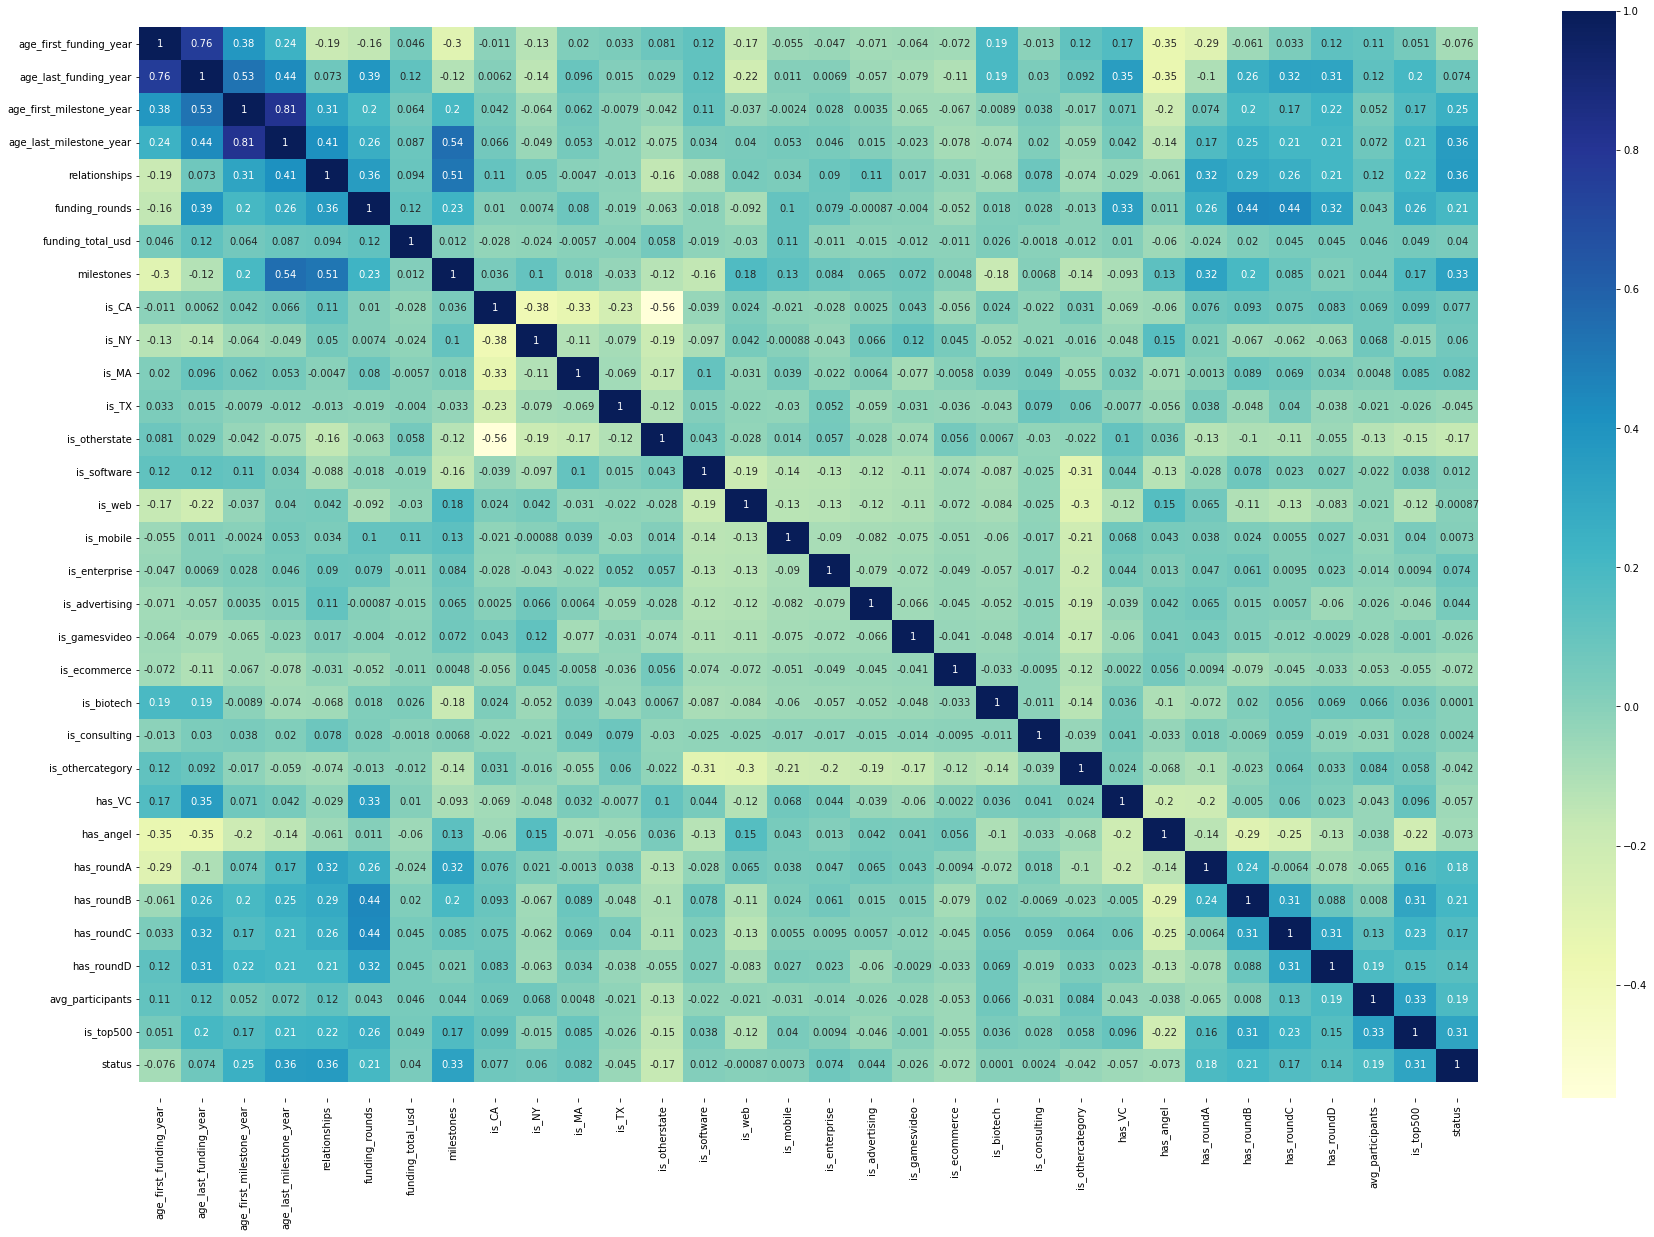

In [31]:
plt.figure(figsize=(30,20))
ax = sns.heatmap(data = stup[features].corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

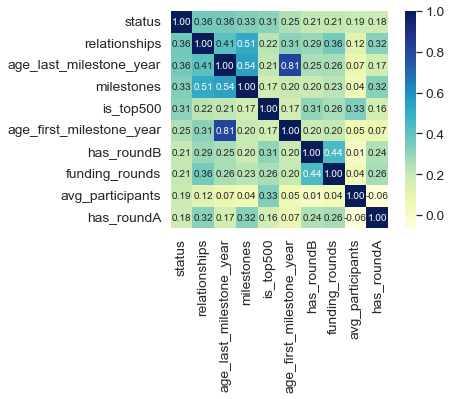

In [32]:
# number of variables for heatmap
cols = stup[features].corr().nlargest(10,'status')['status'].index
cm = np.corrcoef(stup[cols].values.T) 
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='YlGnBu', fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Scatter plot

    based on the correlation table above which says that 'views' and 'likes' are very positively correlated. then we then       verify that by plotting a scatter plot between 'views' and 'likes' to visualize the relationship between those             variables.

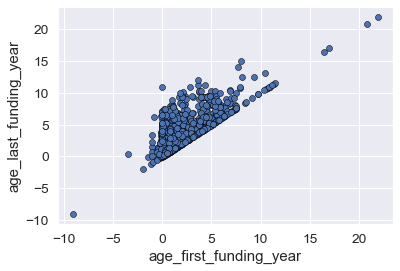

In [33]:
fig, ax = plt.subplots()
fund1 = plt.scatter(x=stup["age_first_funding_year"], y = stup["age_last_funding_year"], edgecolors = "#000000", linewidth=0.5)
fundlab = ax.set(xlabel="age_first_funding_year", ylabel="age_last_funding_year")

    We see that 'age_first_milestones_year' and 'age_last_milestones_year' are really positively correlated 
    whereas when one increases, the other also increases—mostly.

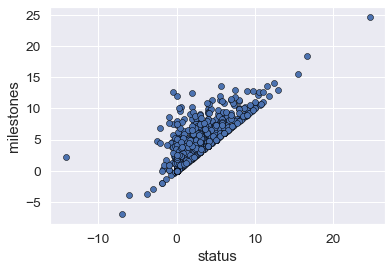

In [34]:
fig, ax = plt.subplots()
mile1 = plt.scatter(x=stup["age_first_milestone_year"], y = stup["age_last_milestone_year"], edgecolors = "#000000", linewidths=0.5)
fundlab = ax.set(xlabel="status", ylabel="milestones")

### Box Plots

In [35]:
FeatureNums = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants']

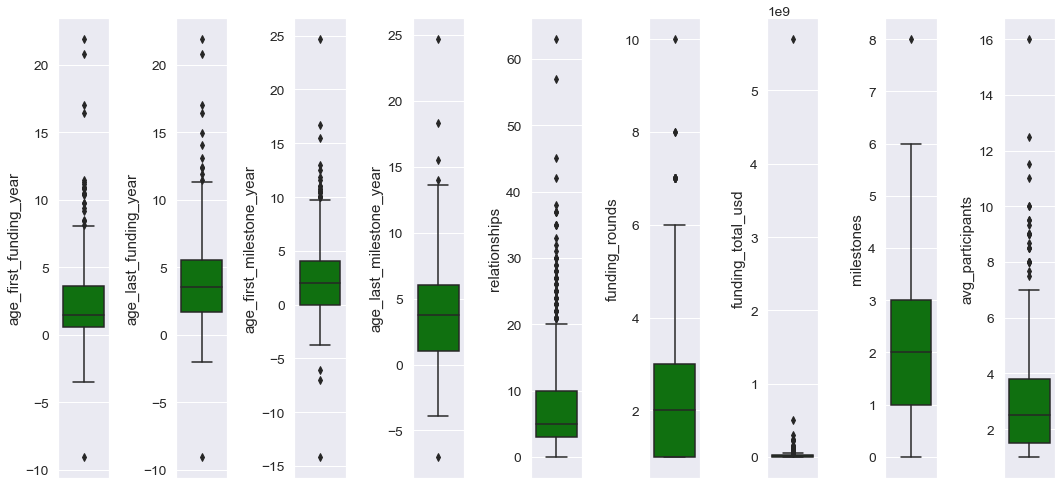

In [36]:
plt.figure(figsize=(15,7))
for i in range(0, len(FeatureNums)):
    plt.subplot(1, len(FeatureNums), i+1)
    sns.boxplot(y=stup[FeatureNums[i]], color='green', orient='v')
    plt.tight_layout()

### Dataset collection of startups founded years

In [37]:
cdf = stup["founded_at"].apply(lambda x: '' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "founded_at": "No_of_startup"})

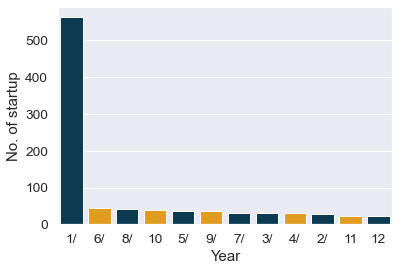

In [38]:
fig, ax = plt.subplots()
cdf1 = sns.barplot(x="year", y="No_of_startup", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#ffa600'], n_colors=7), ax=ax)
Cdf2 = ax.set(xlabel="Year", ylabel="No. of startup")

In [39]:
stup["founded_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=False)

20:1/    563
20:6/     43
20:8/     42
20:10     38
20:5/     36
20:9/     35
20:7/     31
20:3/     30
20:4/     30
20:2/     29
20:11     23
20:12     23
Name: founded_at, dtype: int64

In [40]:
stup["founded_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=True)

20:1/    0.609967
20:6/    0.046587
20:8/    0.045504
20:10    0.041170
20:5/    0.039003
20:9/    0.037920
20:7/    0.033586
20:3/    0.032503
20:4/    0.032503
20:2/    0.031419
20:11    0.024919
20:12    0.024919
Name: founded_at, dtype: float64

    total 563 startups or 60% of startups established in 2001

In [41]:
stup["closed_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=True)

20:31    0.637053
20:1/    0.069339
20:6/    0.041170
20:7/    0.037920
20:2/    0.035753
20:5/    0.033586
20:8/    0.027086
20:10    0.020585
20:3/    0.020585
20:11    0.020585
20:4/    0.019502
20:12    0.018418
20:9/    0.018418
Name: closed_at, dtype: float64

    from the total data available as many as 63% of startups are still standing while the remaining 37% have been closed       and most closed in 2001.

### How many Startup are acquired or have closed ?

In [42]:
stup_acquired = stup[(stup["status"] == True)]
stup_acquired.shape

(597, 47)

In [43]:
stup_closed = stup[(stup["status"] == False)]
stup_closed.shape

(326, 47)

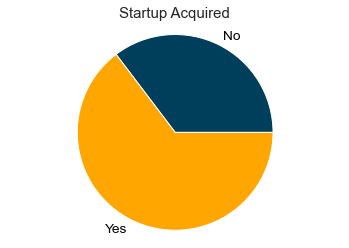

In [44]:
value_counts = stup["status"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Startup Acquired')

### Which category has the largest number of startup

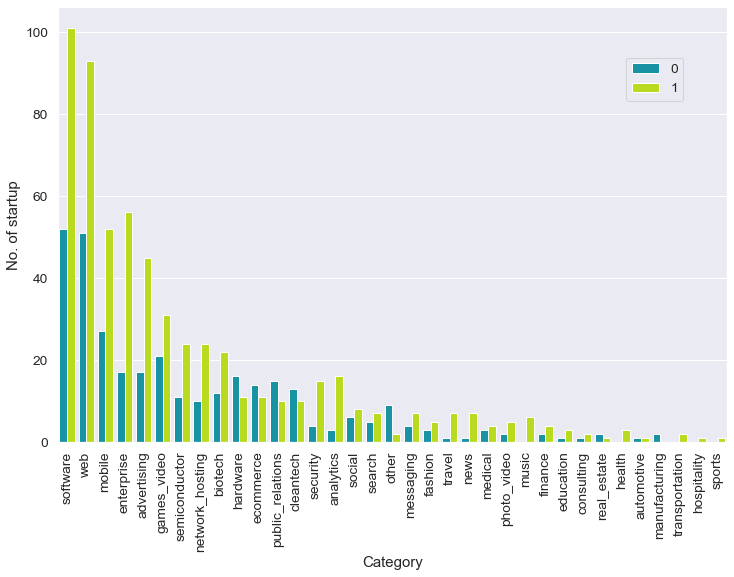

In [45]:
fig, ax = plt.subplots(figsize=(12,8))

lagcate = sns.countplot(x="category_code", hue="status", data=stup, palette="nipy_spectral",
              order=stup.category_code.value_counts().index)

lagcat = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
lagset= ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

#### Which categories  the StartUps has largest number of success rate

In [46]:
success_rate_1 = stup[stup['status']==1].groupby(['category_code']).agg({'status':'count'}).reset_index()
success_rate_1.columns=['category_code','total_success']

In [47]:
success_rate_2 = stup[stup['status']==0].groupby(['category_code']).agg({'status':'count'}).reset_index()
success_rate_2.columns=['category_code','total_closed']

In [48]:
success_rate_3=stup.groupby(['category_code']).agg({'status':'count'}).reset_index()
success_rate_3.columns=['category_code','total_startup']

In [49]:
success_rate_1= success_rate_1.merge(success_rate_2, on='category_code')
success_rate_1= success_rate_1.merge(success_rate_3, on='category_code')

In [50]:
success_rate_1['success_rate']= round((success_rate_1['total_success'] / success_rate_1['total_startup']) * 100,2)

most_succes_rate = success_rate_1.sort_values('success_rate', ascending=False)
most_succes_rate

,category_code,total_success,total_closed,total_startup,success_rate
27,travel,7,1,8,87.50
17,news,7,1,8,87.50
1,analytics,16,3,19,84.21
23,security,15,4,19,78.95
8,enterprise,56,17,73,76.71
7,education,3,1,4,75.00
0,advertising,45,17,62,72.58
19,photo_video,5,2,7,71.43
16,network_hosting,24,10,34,70.59
24,semiconductor,24,11,35,68.57


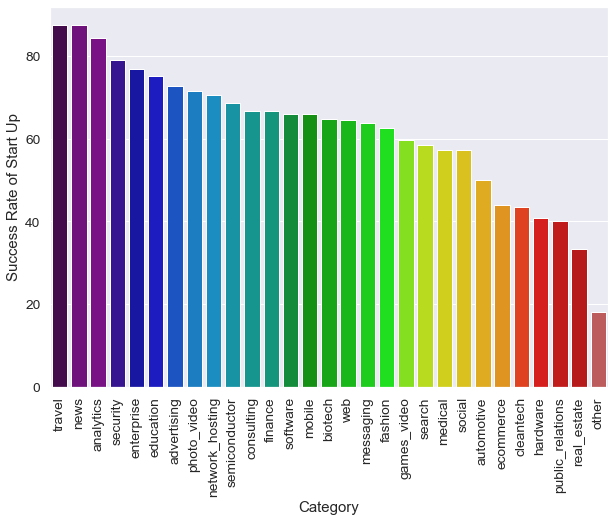

In [51]:
fig, ax = plt.subplots(figsize=(10,7))
categ_stup = sns.barplot(x="category_code", y="success_rate", data=most_succes_rate,
                palette="nipy_spectral", ax=ax)
categ_stup_set = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
categ_stup_label = ax.set(xlabel="Category", ylabel="Success Rate of Start Up")

### Which category the Startups having the most number of total funding

In [52]:
funding_sorted_category = pd.pivot_table(stup,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_category.head(10)

,category_code,funding_total_usd
18,mobile,7263750881
30,software,2657598865
34,web,1729035436
3,biotech,1723699484
8,enterprise,1338882096
4,cleantech,1300284730
28,semiconductor,1105156970
0,advertising,918619012
11,games_video,844643530
12,hardware,773938873


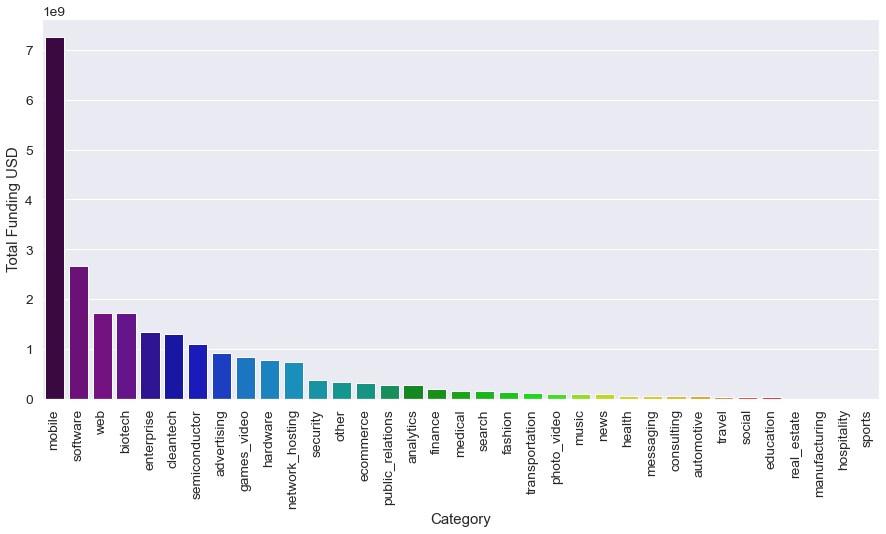

In [53]:
fig, ax = plt.subplots(figsize=(15,7))
total_funding = sns.barplot(x="category_code", y="funding_total_usd", data=funding_sorted_category,
                palette="nipy_spectral", ax=ax)
total_funding_set = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
total_funding_labels = ax.set(xlabel="Category", ylabel="Total Funding USD")

### Which State having most number of Startup

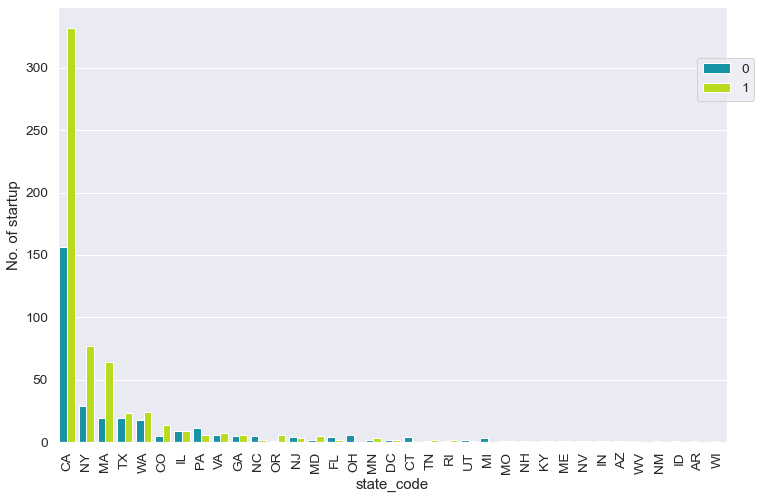

In [54]:
fig, ax = plt.subplots(figsize=(12,8))

most_stup = sns.countplot(x="state_code", hue="status", data=stup, palette="nipy_spectral",
              order=stup.state_code.value_counts().index)

most_stup_set = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
most_stup_label = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [55]:
trending_statea = stup.groupby(['state_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea

,state_code,num_startup
2,CA,488
23,NY,106
12,MA,83
32,WA,42
29,TX,42
3,CO,19
9,IL,18
26,PA,17
31,VA,13
7,GA,11


### Which State having most number of acquired Startup per category

In [56]:
trending_statea = stup_acquired.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea.head(10)

,state_code,category_code,num_startup
31,CA,web,55
72,MA,software,16
111,NY,web,15
144,WA,mobile,5
128,TX,enterprise,4
136,TX,web,4
51,IL,software,4
37,CO,software,4
44,GA,enterprise,2
138,VA,mobile,2


### Which State having most number of closed Startup per category

In [57]:
trending_statec = stup_closed.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statec = trending_statec[trending_statec.groupby('state_code')['num_startup'].transform(max) == trending_statec['num_startup']]
most_trending_statec = most_trending_statec.sort_values('num_startup', ascending=False)
most_trending_statec

,state_code,category_code,num_startup
27,CA,web,25
63,MA,software,8
95,NY,web,6
139,WA,web,5
123,TX,software,5
53,IL,web,3
130,VA,web,2
127,VA,mobile,2
77,NC,software,2
81,NJ,software,2


### Which city having most number of acquired Startup per category

In [58]:
trending_categorya = stup_acquired.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categorya = trending_categorya[trending_categorya.groupby('city')['num_startup'].transform(max) == trending_categorya['num_startup']]
most_trending_categorya = most_trending_categorya.sort_values('num_startup', ascending=False)
most_trending_categorya

,city,category_code,num_startup
275,San Francisco,web,26
195,New York,web,15
331,Sunnyvale,software,9
169,Mountain View,web,9
289,San Mateo,software,9
...,...,...,...
117,Jersey City,ecommerce,1
118,Kansas City,mobile,1
119,Kirkland,enterprise,1
120,Kirkland,mobile,1


### Which city having most number of closed Startup per category

In [59]:
trending_categoryc = stup_closed.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categoryc = trending_categoryc[trending_categoryc.groupby('city')['num_startup'].transform(max) == trending_categoryc['num_startup']].reset_index()
most_trending_categoryc = most_trending_categoryc.sort_values('num_startup', ascending=False)
most_trending_categoryc

,index,city,category_code,num_startup
136,191,San Francisco,mobile,5
137,197,San Francisco,web,5
139,200,San Jose,hardware,5
143,215,Santa Clara,software,5
102,135,New York,games_video,5
...,...,...,...,...
59,72,Fremont,medical,1
60,73,Fremont,software,1
61,74,Glendale,ecommerce,1
62,75,Golden Valley,enterprise,1


### Which city having most number of total funding

In [60]:
funding_sorted_city = pd.pivot_table(stup,
              index=['city'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_city.columns = ['city', 'funding_total_usd']
funding_sorted_city = funding_sorted_city.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_city = funding_sorted_city.head(10)
funding_sorted_city

,city,funding_total_usd
91,Kirkland,5718914576
174,San Francisco,1673487129
135,New York,1231405734
125,Mountain View,985553322
181,Santa Clara,839050274
176,San Jose,733181780
13,Austin,706317317
173,San Diego,614475001
163,Redwood City,521330100
110,Loveland,510000000


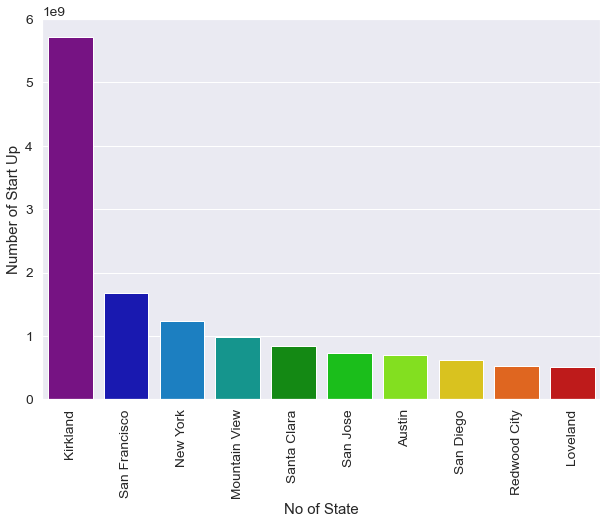

In [61]:
fig, ax = plt.subplots(figsize=(10,7))
fund_sort= sns.barplot(x="city", y="funding_total_usd", data=funding_sorted_city,
                palette="nipy_spectral", ax=ax)
fund_sort_set = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fund_sort_label = ax.set(xlabel="No of State", ylabel="Number of Start Up")

In [62]:
stup_what_in_kirkland = stup[(stup["city"] == 'Kirkland')]
stup_what_in_kirkland.shape

(2, 47)

In [63]:
stup_what_in_kirkland.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
62,332,WA,47.675489,-122.191667,98033-6314,c:19861,Kirkland,Kirkland WA 98033-6314,SchemaLogic,1/1/2001,...,c:19861,1,0,0,0,1,0,3.00,1,1
364,86,WA,30.632480,-86.984345,98033,c:13219,Kirkland,Kirkland WA 98033,Clearwire,10/1/2003,...,c:13219,0,0,0,0,0,0,4.25,1,1


    Round A, Round B,Round C, Round D, VC, Angel = 0 earlier startup status acquired ????????? 
    there is something strange about this data, the possibility of invalid data

#### How many Startup have has_VC?

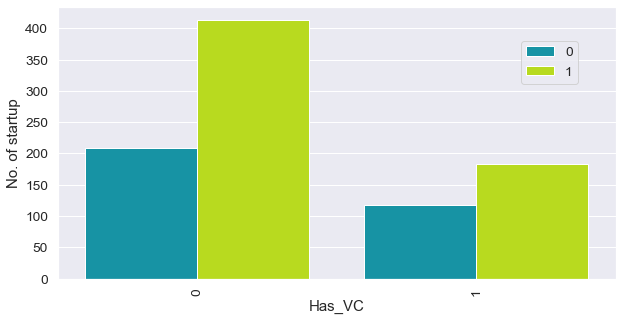

In [64]:
fig, ax = plt.subplots(figsize=(10,5))

VC = sns.countplot(x="has_VC", hue="status", data=stup, palette="nipy_spectral",
              order=stup.has_VC.value_counts().index)

VC_set = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
VC_set_label = ax.set(xlabel="Has_VC", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

#### How many Startup have is_top500?

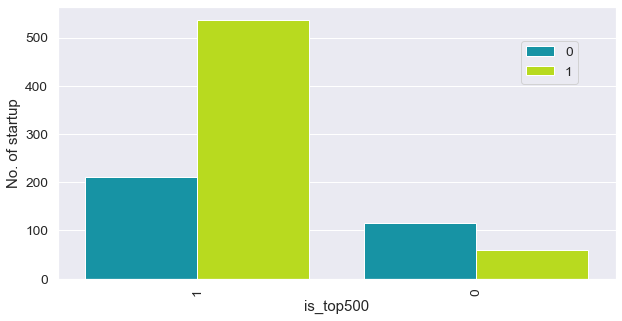

In [65]:
fig, ax = plt.subplots(figsize=(10,5))

top500 = sns.countplot(x="is_top500", hue="status", data=stup, palette="nipy_spectral",
              order=stup.is_top500.value_counts().index)

top500_set = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
top500_set_label = ax.set(xlabel="is_top500", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [66]:
# How many Startup have both 'acquired' status and is_top500?
len(stup[(stup["status"] == True) & (stup["is_top500"] == True)].index)

537

In [67]:
#How many Startup have both 'closed' status and is_top500?
len(stup[(stup["status"] == False) & (stup["is_top500"] == False)].index)

116

In [68]:
stup_acquired["is_top500"].value_counts(normalize=True)

1    0.899497
0    0.100503
Name: is_top500, dtype: float64

#### How many years on average the company closes

In [69]:
stup_closed.founded_at=pd.to_datetime(stup_closed.founded_at)
stup_closed.closed_at=pd.to_datetime(stup_closed.closed_at)

C:\Users\rs952\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [70]:
stup_closed['age_closed_startup'] = stup_closed.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

C:\Users\rs952\AppData\Local\Temp/ipykernel_14704/1310945553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stup_closed['age_closed_startup'] = stup_closed.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)


In [71]:
stup_closed['age_closed_startup'].head()

4     792 days
5    2602 days
11   2161 days
12   3039 days
15   4104 days
Name: age_closed_startup, dtype: timedelta64[ns]

In [72]:
stup_closed['year'] = stup_closed['age_closed_startup'].dt.days /365

C:\Users\rs952\AppData\Local\Temp/ipykernel_14704/2043735588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stup_closed['year'] = stup_closed['age_closed_startup'].dt.days /365


In [73]:
stup_closed.head(3)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_closed_startup,year
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,2010-08-01,...,1,0,0,0,0,1.00,1,0,792 days,2.169863
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,2002-01-01,...,0,0,1,0,0,3.00,1,0,2602 days,7.128767
11,835,CA,37.452992,-122.185098,94025,c:4829,Menlo Park,Menlo Park CA 94025,Center'd,2006-01-01,...,1,1,0,0,0,1.75,1,0,2161 days,5.920548


In [74]:
(stup_closed['age_closed_startup'].mean())

Timedelta('2184 days 17:13:37.177914112')

In [75]:
ratarata = round(2184 / 365) 
print("Rata-Rata Startup Closed :", ratarata ,"tahun")

Rata-Rata Startup Closed : 6 tahun


#### which relationship related to acquired or closed startup?

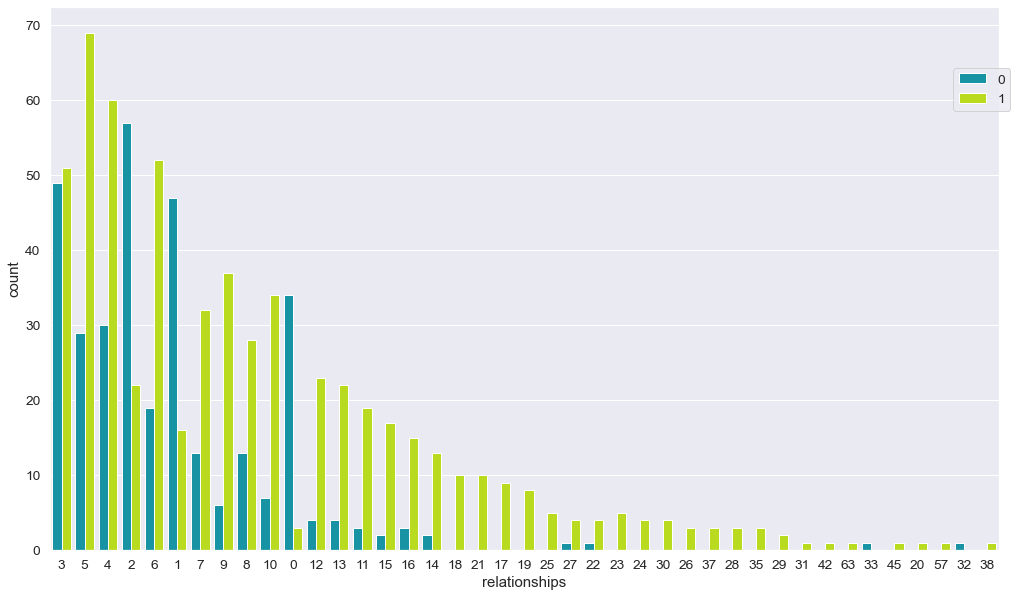

In [76]:
fig, ax = plt.subplots(figsize=(17,10))

sns.countplot(x="relationships", hue="status", data=stup, palette="nipy_spectral",
              order=stup.relationships.value_counts().index)
plt.legend(bbox_to_anchor=(0.945, 0.90))

#### which funding_rounds related to acquired or closed startup?

<AxesSubplot:xlabel='funding_rounds', ylabel='count'>

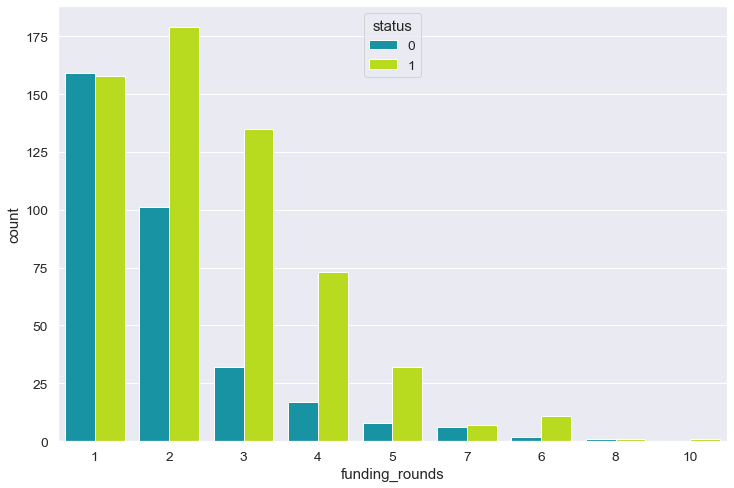

In [77]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="funding_rounds", hue="status", data=stup, palette="nipy_spectral",
              order=stup.funding_rounds.value_counts().index)

#### Investing Feature on Acquired

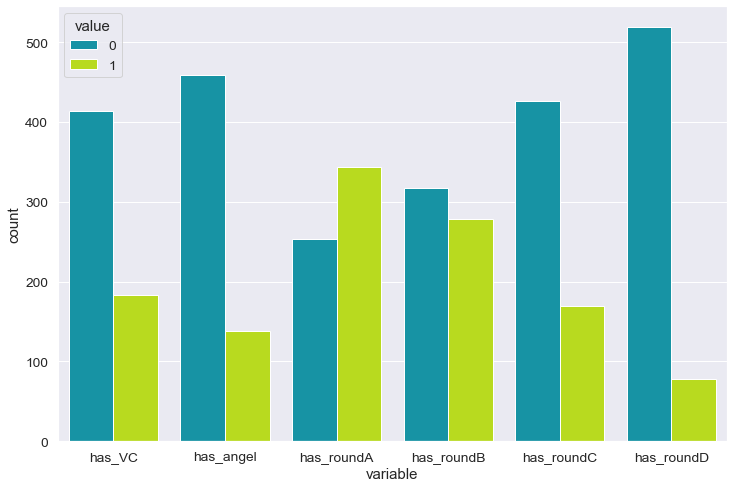

In [78]:
coba = stup[(stup["status"] == 1)]

features = coba[["has_VC","has_angel","has_roundA","has_roundB","has_roundC","has_roundD"]]

fig, ax = plt.subplots(figsize=(12,8))

a= np.random.choice(["{}".format(i) for i in [1,2,3,4,5,6]], size=(12,8))
coba = pd.DataFrame(a, columns=["has_{}".format(i) for i in list("features")])

sns.countplot(x="variable", hue="value",palette="nipy_spectral", data=pd.melt(features))

plt.show()

## Data Preprocessing

### Duplicate Values

In [80]:
#check
duplicate = stup[stup.duplicated()] 
  
print("Duplicate Rows :")

Duplicate Rows :


### Negative value

In [81]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(stup[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [82]:
stup=stup.drop(stup[stup.age_first_funding_year<0].index)
stup=stup.drop(stup[stup.age_last_funding_year<0].index)
stup=stup.drop(stup[stup.age_first_milestone_year<0].index)
stup=stup.drop(stup[stup.age_last_milestone_year<0].index)

In [84]:
for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(stup[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


### Outliers

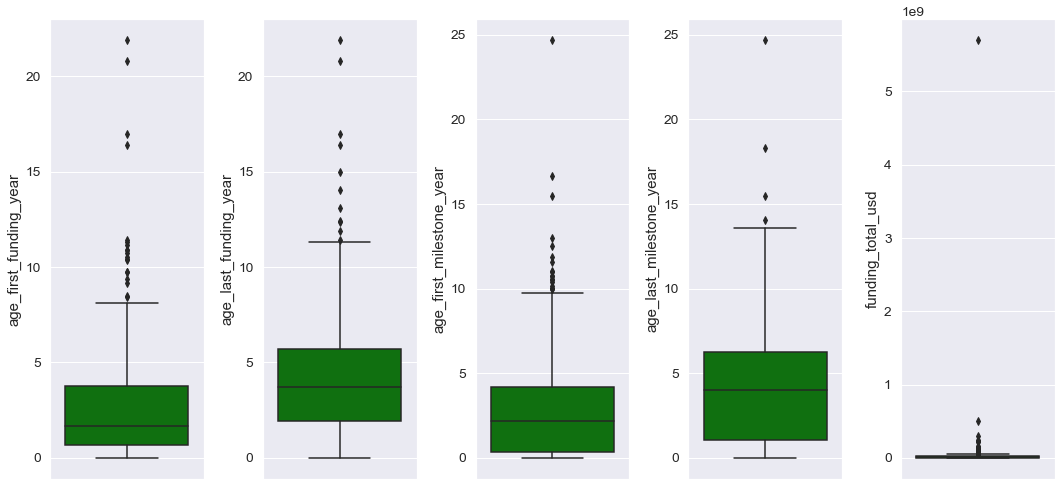

In [86]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=stup[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

## Log-transformation of the funding and milestone year variable

In [87]:
stup["age_first_funding_year"] = np.log1p(stup["age_first_funding_year"])
stup["age_last_funding_year"] = np.log1p(stup["age_last_funding_year"])
stup["age_first_milestone_year"] = np.log1p(stup["age_first_milestone_year"])
stup["age_last_milestone_year"] = np.log1p(stup["age_last_milestone_year"])
stup["funding_total_usd"] = np.log1p(stup["funding_total_usd"])

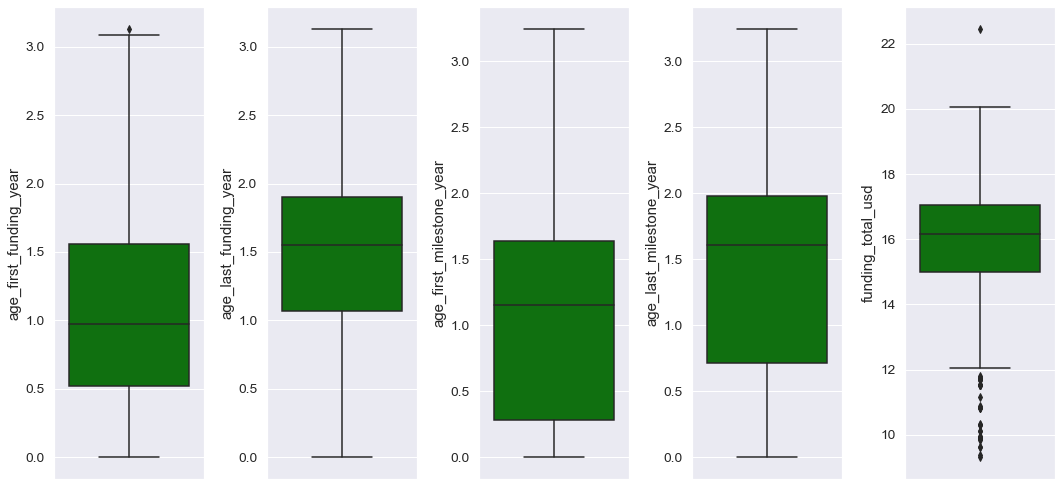

In [88]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=stup[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

## Feature Engineering

### New Column "has_RoundABCD"

In [89]:
stup['has_RoundABCD'] = np.where((stup['has_roundA'] == 1) | (stup['has_roundB'] == 1) | (stup['has_roundC'] == 1) | (stup['has_roundD'] == 1), 1, 0)
stup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,...,0,1,0,0,0,0,1.0000,0,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,...,1,0,0,1,1,1,4.7500,1,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,0,0,1,0,0,0,4.0000,1,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,...,0,0,0,1,1,1,3.3333,1,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,...,1,1,0,0,0,0,1.0000,1,0,0


### New Column "has_Investor"

In [90]:
stup['has_Investor'] = np.where((stup['has_VC'] == 1) | (stup['has_angel'] == 1), 1, 0)
stup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,...,1,0,0,0,0,1.0000,0,1,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,...,0,0,1,1,1,4.7500,1,1,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,0,1,0,0,0,4.0000,1,1,1,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,...,0,0,1,1,1,3.3333,1,1,1,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,...,1,0,0,0,0,1.0000,1,0,0,1


In [91]:
len(stup[(stup["has_RoundABCD"] == 1)].index)

636

In [92]:
len(stup[ (stup['has_RoundABCD']  == 1) & (stup['status']  == 1) ].index)

459

In [93]:
len(stup)

840

In [94]:
923-490

433

### New Column "has_Seed"

In [95]:
stup['has_Seed'] = np.where((stup['has_RoundABCD'] == 0) & (stup['has_Investor'] == 1), 1, 0)
stup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,...,0,0,0,0,1.0000,0,1,0,1,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,...,0,1,1,1,4.7500,1,1,1,1,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,1,0,0,0,4.0000,1,1,1,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,...,0,1,1,1,3.3333,1,1,1,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,...,0,0,0,0,1.0000,1,0,0,1,1


In [96]:
stup['has_Seed'] == 1

0       True
1      False
2      False
3      False
4       True
       ...  
918    False
919    False
920    False
921    False
922    False
Name: has_Seed, Length: 840, dtype: bool

In [99]:
len(stup[(stup["has_Seed"] == 1)].index)

179

### New Column "invalid_startup

In [100]:
stup['invalid_startup'] = np.where((stup['has_RoundABCD'] == 0) & (stup['has_VC'] == 0) & (stup['has_angel'] == 0), 1, 0)
stup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed,invalid_startup
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,...,0,0,0,1.0000,0,1,0,1,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,...,1,1,1,4.7500,1,1,1,1,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,0,0,0,4.0000,1,1,1,0,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,...,1,1,1,3.3333,1,1,1,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,...,0,0,0,1.0000,1,0,0,1,1,0


In [101]:
len(stup[(stup["invalid_startup"] == 1)].index)

25

### New Column "age_startup_year"

In [102]:
stup.founded_at=pd.to_datetime(stup.founded_at)
stup.closed_at=pd.to_datetime(stup.closed_at)

In [103]:
stup['age_closed_startup'] = stup.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

In [104]:
stup['age_closed_startup'].head()

0   2556 days
1   5113 days
2   1749 days
3   4382 days
4    792 days
Name: age_closed_startup, dtype: timedelta64[ns]

In [105]:
stup['age_startup_year'] = stup['age_closed_startup'].dt.days /365

### New Column "tier_relationships"

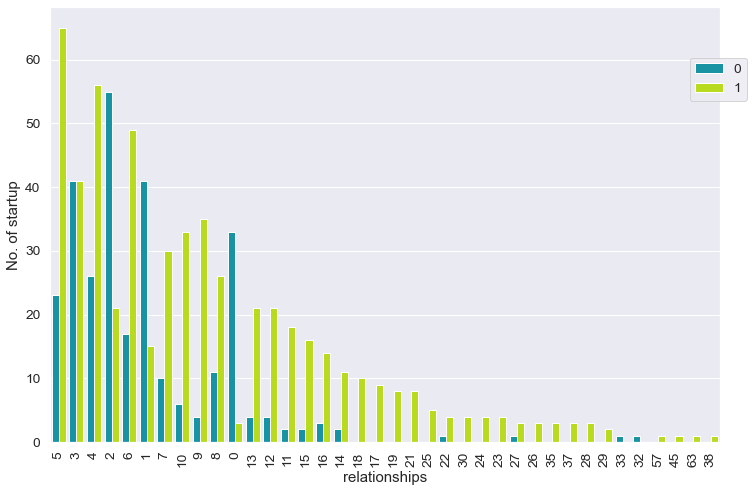

In [106]:
fig, ax = plt.subplots(figsize=(12,8))

relation_column = sns.countplot(x="relationships", hue="status", data=stup, palette="nipy_spectral",
              order=stup.relationships.value_counts().index)

relation_column_set = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
set_labels = ax.set(xlabel="relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [107]:
# create a list of our conditions
conditions = [
    (stup['relationships'] <= 5),
    (stup['relationships'] > 5) & (stup['relationships'] <= 10),
    (stup['relationships'] > 10) & (stup['relationships'] <= 16),
    (stup['relationships'] > 16)
    ]

In [108]:
# create a list of the values we want to assign for each condition
values = ['4', '3', '2', '1']

In [109]:
# create a new column and use np.select to assign values to it using our lists as arguments
stup['tier_relationships'] = np.select(conditions, values)

In [110]:
# display updated DataFrame
stup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed,invalid_startup,age_closed_startup,age_startup_year,tier_relationships
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,2007-01-01,...,1.0000,0,1,0,1,1,0,2556 days,7.002740,4
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,2000-01-01,...,4.7500,1,1,1,1,0,0,5113 days,14.008219,3
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,2009-03-18,...,4.0000,1,1,1,0,0,0,1749 days,4.791781,4
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,2002-01-01,...,3.3333,1,1,1,0,0,0,4382 days,12.005479,4
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,2010-08-01,...,1.0000,1,0,0,1,1,0,792 days,2.169863,4


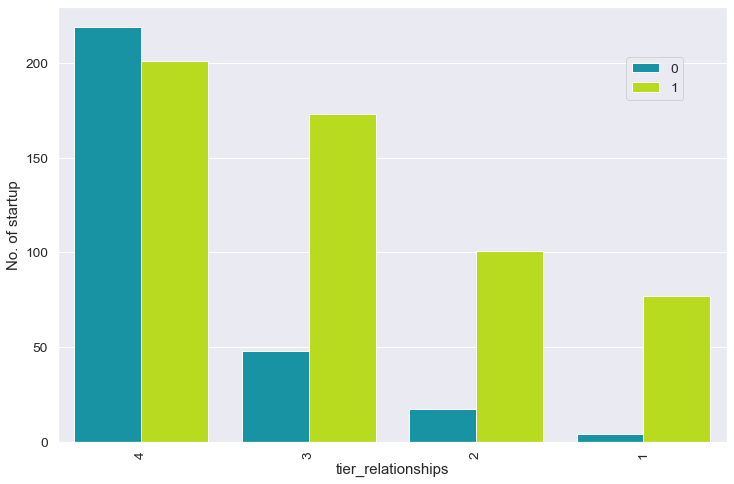

In [111]:
fig, ax = plt.subplots(figsize=(12,8))

rela1 = sns.countplot(x="tier_relationships", hue="status", data=stup, palette="nipy_spectral",
              order=stup.tier_relationships.value_counts().index)

rela1_set = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
rela_set_label = ax.set(xlabel="tier_relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [112]:
stup['tier_relationships'] = stup.tier_relationships.astype(int)

## Modeling

In [124]:
cat_feature = stup.select_dtypes(include='object')
cat_feature.head()

""
0
1
2
3
4


In [128]:
from sklearn.model_selection import train_test_split
# Split the data
# Input/independent variables
x = stup.drop('status', axis = 1)
# her we are droping the output feature as this is the target and 'X' is input features, the changes are not 
# made inplace as we have not used 'inplace = True'

y = stup['status'] # Output/Dependent variable

In [136]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [171]:
# lets print the shapes again 
print("Shape of the X Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", x_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (672, 36)
Shape of the y Train : (672,)
Shape of the X test : (168, 36)
Shape of the y test : (168,)


In [138]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

### LGBM Classifier

    Feature importance by LGBM

In [139]:
import lightgbm as lgb

In [180]:
#lightGBM model fit
gbm = lgb.LGBMRegressor()
gbm.fit(x_train,y_train)
gbm.booster_.feature_importance()

# importance of each attribute
fea_imp_ = pd.DataFrame({'cols':x.columns, 'fea_imp':gbm.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

,cols,fea_imp
34,age_startup_year,553
0,age_first_funding_year,315
1,age_last_funding_year,292
5,funding_total_usd,291
3,age_last_milestone_year,239
2,age_first_milestone_year,215
28,avg_participants,134
6,milestones,64
35,tier_relationships,56
21,is_othercategory,34


Training Accuracy : 1.0
Testing Accuracy : 0.9047619047619048


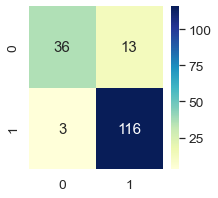

              precision    recall  f1-score   support

           0       0.92      0.73      0.82        49
           1       0.90      0.97      0.94       119

    accuracy                           0.90       168
   macro avg       0.91      0.85      0.88       168
weighted avg       0.91      0.90      0.90       168

------------------------------------------
ROC Curves              = 0.8547418967587034
Precision-Recall Curves = 0.9459359325125398


In [183]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()

clf.fit(x_train,y_train)

y_pred_lgb = clf.predict(x_test)

print("Training Accuracy :", clf.score(x_train, y_train))
print("Testing Accuracy :", clf.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred_lgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_lgb)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_lgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)
Precision_Recall_lgbm = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_lgbm)

### XGBoost Classifier

Training Accuracy : 1.0
Testing Accuracy : 0.8809523809523809


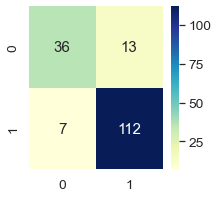

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        49
           1       0.90      0.94      0.92       119

    accuracy                           0.88       168
   macro avg       0.87      0.84      0.85       168
weighted avg       0.88      0.88      0.88       168

------------------------------------------
ROC Curves              = 0.8379351740696277
Precision-Recall Curves = 0.939421568627451


In [185]:
from xgboost import XGBClassifier

#train
xgb = XGBClassifier()

xgb.fit(x_train,y_train)

#predict
y_predicted_xgb = xgb.predict(x_test)

print("Training Accuracy :", xgb.score(x_train, y_train))
print("Testing Accuracy :", xgb.score(x_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_xgb)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_xgb)
f1 = f1_score(y_test, y_predicted_xgb)
Precision_Recall_xgb = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_xgb)

### GradientBoostingClassifier

Training Accuracy : 1.0
Testing Accuracy : 0.875


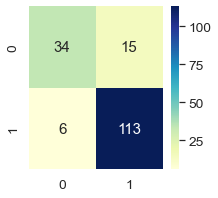

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        49
           1       0.88      0.95      0.91       119

    accuracy                           0.88       168
   macro avg       0.87      0.82      0.84       168
weighted avg       0.87      0.88      0.87       168

------------------------------------------
ROC Curves              = 0.8217286914765906
Precision-Recall Curves = 0.9340533088235293


In [186]:
from sklearn.ensemble import GradientBoostingClassifier
#train
gbc = GradientBoostingClassifier(learning_rate=0.02,
                    max_depth=4,
                    random_state=100, n_estimators=1000)


gbc.fit(x_train,y_train)

#predict
y_predicted_gb = gbc.predict(x_test)

print("Training Accuracy :", gbc.score(x_train, y_train))
print("Testing Accuracy :", gbc.score(x_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_gb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_gb)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_gb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_gb)
f1 = f1_score(y_test, y_predicted_gb)
Precision_Recall_gbs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_gbs)

### AdaBoostClassifier

Training Accuracy : 0.8824404761904762
Testing Accuracy : 0.8690476190476191


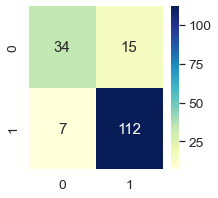

              precision    recall  f1-score   support

           0       0.83      0.69      0.76        49
           1       0.88      0.94      0.91       119

    accuracy                           0.87       168
   macro avg       0.86      0.82      0.83       168
weighted avg       0.87      0.87      0.87       168

roc_auc 0.8175270108043217
------------------------------------------
ROC Curves              = 0.8175270108043217
Precision-Recall Curves = 0.9323664505172148


In [187]:
from sklearn.ensemble import AdaBoostClassifier
#train
ada = AdaBoostClassifier()


ada.fit(x_train,y_train)

#predict
y_predicted_ab = ada.predict(x_test)

print("Training Accuracy :", ada.score(x_train, y_train))
print("Testing Accuracy :", ada.score(x_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_ab)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_ab)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_ab)
f1 = f1_score(y_test, y_predicted_ab)
Precision_Recall_abs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_abs)

### Random Forest

Training Accuracy : 1.0
Testing Accuracy : 0.8214285714285714


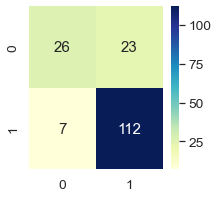

              precision    recall  f1-score   support

           0       0.79      0.53      0.63        49
           1       0.83      0.94      0.88       119

    accuracy                           0.82       168
   macro avg       0.81      0.74      0.76       168
weighted avg       0.82      0.82      0.81       168

------------------------------------------
ROC Curves              = 0.7358943577430972
Precision-Recall Curves = 0.9062363834422658


In [188]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train,y_train)


y_pred_rf = rf.predict(x_test)

print("Training Accuracy :", rf.score(x_train, y_train))
print("Testing Accuracy :", rf.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

### Summary

In [189]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

scores = {'LGBM':  { 
                             'precision_score': precision_score(y_test, y_pred_lgb),
                             'recall_score': recall_score(y_test, y_pred_lgb)
                         },        
                 'GradientBoosting Classifier':  { 
                             'precision_score': precision_score(y_test, y_predicted_gb),
                             'recall_score': recall_score(y_test, y_predicted_gb)
                         },
                 'Adaboost Classifier':  { 
                             'precision_score': precision_score(y_test, y_predicted_ab),
                             'recall_score': recall_score(y_test, y_predicted_ab)
                         },
                 'XGBoost':  { 
                             'precision_score': precision_score(y_test, y_predicted_xgb),
                             'recall_score': recall_score(y_test, y_predicted_xgb)
                         },
                 'Random Forest':  { 
                             'precision_score': precision_score(y_test, y_pred_rf),
                            'recall_score': recall_score(y_test, y_pred_rf)
                         }
            }

In [190]:
from sklearn.metrics import precision_score


Precision_Recall = {'LGBM':  { 
                             'Precision_Recall': Precision_Recall_lgbm
                         },        
                 'GradientBoosting Classifier':  { 
                             'Precision_Recall': Precision_Recall_gbs
                         },
                 'Adaboost Classifier':  { 
                             'Precision_Recall': Precision_Recall_abs
                         },
                 'XGBoost':  { 
                             'Precision_Recall': Precision_Recall_xgb
                         },
                 'Random Forest':  { 
                             'Precision_Recall': Precision_Recall_rfs
                         }
            }

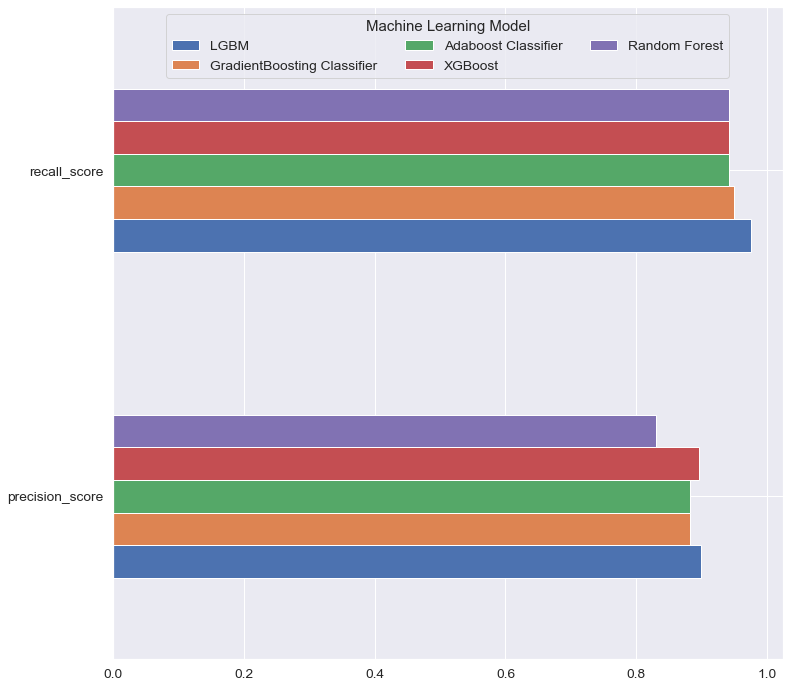

In [191]:
scores = pd.DataFrame(scores)


scores.plot(kind="barh",figsize=(12, 12)).legend(loc='upper center', ncol=3, title="Machine Learning Model")

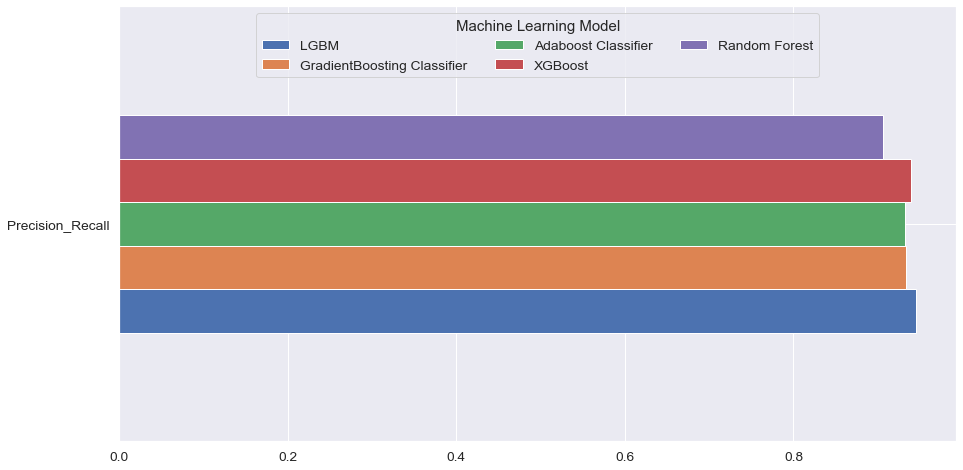

In [192]:
Precision_Recall = pd.DataFrame(Precision_Recall)


Precision_Recall.plot(kind="barh",figsize=(15, 8)).legend(loc='upper center', ncol=3, title="Machine Learning Model")